# Plot PPDisk Simple Model 1 Part2 - CO Line
* CREDIT: RADMC-3D EXAMPLES
* MODELING TARGET: HD163296

## 00 - About *HD163296*

### Information:
* RA/DEC: 17h53m20.6063742757s -21d56m57.379723676s 
* Star Class: Herbig Ae/Be star
* Spectral Type: A1Vep C
* Star Mass: 2.3 $M_{\odot}$
* Star Radius: 1.66 $R_{\odot}$
* Star Temperature: 9330 K
* Distance to us: 140. pc
* Inclination Angle: $42^{\circ}$
* Position Angle: $132^{\circ}$
* Disk Radius: 250. unit:AU
* Gap Position: 60., 100., 160. unit:AU
* Gap Width: 33., 26., 55. unit:AU

### Reference:
* *Rosenfeld et al.(2013)*
* *Isella et al. (2016)*
* *Gregorio-Monsalvo et al. (2013)*
* http://simbad.u-strasbg.fr/simbad/sim-id?Ident=HD+163296
* http://www.exoplanetkyoto.org/exohtml/HD_163296.html
* https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html

## 00 - Line Radmc3d Input (Control File for Molecule Lines)

In [31]:
nphot    = 1000000
# Add Line parameter to Dust radmc3d.inp control file
with open('radmc3d.inp','w+') as f:
    f.write('nphot = %d\n'%(nphot))
    f.write('scattering_mode_max = 1\n')   # Put this to 1 for isotropic scattering
    #f.write('tgas_eq_tdust   = 1')         # Assume Temp of Gas equals to Temp of Dust

In [32]:
# Open Line Mode
from os import system
from os.path import isfile
if not isfile('lines.inp'):
    # Write the lines.inp control file
    with open('lines.inp','w') as f:
        f.write('1\n')
        f.write('1\n')
        f.write('co    leiden    0    0\n')

## 01 - Setup

In [33]:
import os
import numpy as np
import matplotlib.pylab as plb
from radmc3dPy import *

In [34]:
def lam_to_freq(lam):
    '''
    lam: wavelength in um
    '''
    freq = 1e4 * natconst.cc / lam
    return freq

## 02 - Make Channel Image (WI Continuum Background)

#### 12CO (J 3-2) Line 
* Rest Freqency $f_0$: 461.04076820 GHz (650.7016748 $\mu m$)

### (1) Find HD163296 Rest Freqency

Reading image.out


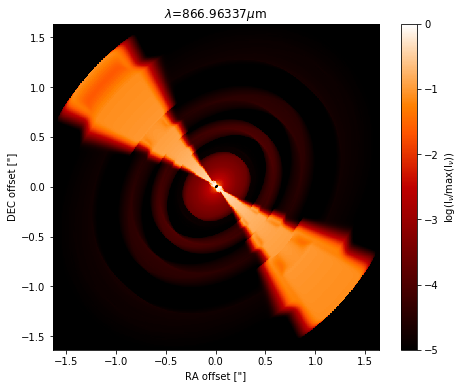

In [65]:
# Make and plot an example image
image.makeImage(npix=500., incl=42., posang=-132., sizeau=400., vkms=0.0, iline=3)
im = image.readImage()
plb.figure(figsize=(8,6))
image.plotImage(im, arcsec=True, dpc=122., log=True, maxlog=5., cmap=plb.cm.gist_heat)
plb.show()

### (2) Find HD123696 Boundary Channel

Reading image.out


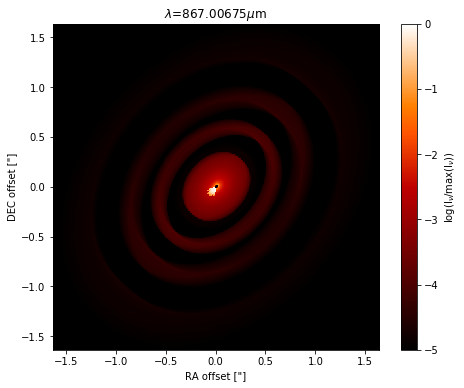

In [50]:
# Make and plot an example image
image.makeImage(npix=500., incl=42., posang=-132., sizeau=400., vkms=15.0, iline=3)
im = image.readImage()
plb.figure(figsize=(8,6))
image.plotImage(im, arcsec=True, dpc=122., log=True, maxlog=5., cmap=plb.cm.gist_heat)
plb.show()

### (3) Make HD163296 Multi-Image

In [38]:
# Make and plot an example image
# vkms_list = np.linspace(-5, 5, 11, endpoint=True)
# for i, vkms in enumerate(vkms_list):
#     image.makeImage(npix=500., incl=42., posang=-132., sizeau=400., vkms=vkms, iline=3)
#     im = image.readImage()
#     plb.figure(figsize=(8,6))
#     image.plotImage(im, arcsec=True, dpc=122., log=True, maxlog=5., cmap=plb.cm.gist_heat)
# plb.show()

## 03 -  Write Make Data Cube

### (1) Make CO 3-2 Cube

In [53]:
fitsname = input('Output Filename = ')
wav_central = 866.96337
wav_width = 0.04338
image.makeImage(npix=500., incl=42., posang=-132., sizeau=400., lambdarange=[wav_central-wav_width, wav_central+wav_width], nlam=30) #vkms=0.0, iline=3)
im = image.readImage()
im.writeFits(fitsname, dpc=122., coord='17h53m20.6063742757s -21d56m57.379723676s')

Output Filename =  HD163296_Cube.fits


Reading image.out
HD163296_Cube.fits already exists


Do you want to overwrite it (yes/no)? yes


In [64]:
#
# Add Restfreqency to cube file
#
from astropy.io import fits
data = fits.getdata('HD163296_Cube.fits')
header = fits.getheader('HD163296_Cube.fits')
header['RESTFRQ'] = natconst.cc*1e-2/866.96337e-6 
fits.writeto('HD163296_CO3-2.fits', data, header, overwrite=True)